# Artificial Neural Network for Image Classification

In this lab, we introduce the concept of artificial neural networks. We will not be able to cover this topic in depth, only enough to build an intuition about how they function. 

As part of this lab, we will use the ResNet50 pre-trained neural network model to demonstrate its image recognition capability, in contrast to the simple logistic regression model in a previous lab. 

## Logistic Regression As Model For a Neuron

[<img src="images/LogisticRegressionNeuron.jpg" width="512"/>](images/LogisticRegressionNeuron.jpg)

Recall that we used logistic regression as a model for image classification.  Note the similarity between the logistic regression model and a biological neuron. A biological neuron:
- received many input from its dendrites.
- Performs some processing on the input.
- Produces output on its axon.

Even though the actual computation performed by a biological neuron is not well understood, approximating such computation with a model such as the one used by logistic regression enables us to construct machine learning models capable of performing very complex functions.

## A Convolution Neural Network For Image Classification

[<img src="images/ConvolutionNetwork.jpg" width="720"/>](images/ConvolutionNetwork.jpg)

A convolution neural network may be used to classify images much more complex than the hand writing samples used for the logistic regression lab.  For the purpose of this lab, it is not necessary to fully understand the details of the connections between the different layers of the neural network. It is only necessary that we are aware that a specific structure is being used in the model that has been found to be useful.

The input to the model is a "nxnx3" image, where the third dimension is used to store the red, blue, green values of each pixel.

The convolution layers are used for learning the images:
- The first layer is a convolution layer with dimension "n x n x k", where
   - each "pixel" of the convolution layer is a single artificial neuron receiving input from the previous layer, and producing output for the next layer.
   - k is determined by the modeller as a "good value" for the images to be classified, for example, 96.
   - n x n is the dimesion of the input image.
- Each pixel in the input image is not connected to every pixel in the first convolution layer. Instead, a "sliding window" subset is used such that each "artificial neuron" in the convolution layer is only connected with input in that "sliding window". This is the reason for the name "convolution layer".
- Additional convolution layers may be added, where each artificial neuron in the next layer receives input from a "sliding window" in the previous layer.
- Dimension reduction is ofen used along the way to reduce the size of subsequent layers.

In the next stage, fully connected layers are used to produce the results for final classification.

A convolution neural network is an example of a deep neural network because it may be many layers deep. Associated with each connection between layers is a weight "w" for that connection, just like the weights for the simpler logistic regression model. However, due to the depth of the model, there are many more weights. 

**It is important to understand that at the high level, deriving the model is equivalent to caclaulating the weights across all layers such that they best fit the input data. This is an optimization problem with very large number of parameters, up to tens of millions.** What is different compared to logistic reqression is the structure of the model, and the number of weights that need to be calculated.  After training, the model may be used to classify new images. Note that finding a solution for such large models is not feasible with CPUs. Graphical Processing Units (GPUs) are much better suited because matrix computationss for computer graphics are readily applicable to solving these models . 

## Intuition About How Convolution Network Works

It is known through biological experiments that:
- Different neurons react to different parts of your visual field
- Different neurons react to different visual features, such as different shapes.
- Neurons are arranged in layers.

The convolution neural network is a model of how vision works. In addition, as a linear model, it can also gives us intuition about how the weights are trained to disocver visual features.

This [paper by Krizhevsky et al](https://www.cs.toronto.edu/~kriz/imagenet_classification_with_deep_convolutional.pdf) describes a convolution neural network model that contains:
- 650,000 artificial neurons
- 60 million parameters (weights)
- 5 convolution layers
- test set of 1.2 million 
- 1000 different classes to be classified.

A modified version of this model won the 2012 [image net classification](https://image-net.org/challenges/LSVRC/) challenge, where it had an error rate of 15.3% when identifying the top-5 most likely class for each test image, twice as good as the second place.

The first layer of the model has a depth of 96, which enables each to serve as a filter to detect a combined total of 96 different visual features. There is a picture in the paper, reproducted below, of the shapes detected by each filter.  It is important to note, once again, that these features are not programmed into the model, but discovered by the model via training. Note the the variety of simple shapes detected. 

[<img src="images/ConvolutionFirstLayer.jpg" width="512"/>](images/ConvolutionFirstLayer.jpg)


The function of each subsequent layers is to combine the visual features of the previous layer into higher level visual  features.  The following is taken from this [article](https://bdtechtalks.com/2020/01/06/convolutional-neural-networks-cnn-convnets/), which contains a picture detailing what is detected by each layer. Note that:
- The first layer detects simple shapes.
- The second layer is able to detect complex combinations of shapes, including circular shapes.
- The third layer is able to detect complex combinations of second layers, including honeycomb shapes.
- The complexity of the features increase along the way, until the final layer, where it is able to classify complex pictures.

[<img src="images/ConvolutionFeaturesLearned.jpg" width="512"/>](images/ConvolutionFeaturesLearned.jpg)

## ResNet Convolution Neural Network

THe [ResNet](https://arxiv.org/pdf/1512.03385.pdf)model won the 2015 image net classification challenge. It
- contains more than 150 layers
- contains over 62 million parameters
- achieved top-5 accuracy of 3.57% 

For our lab, we will be using the pre-trained [ResNet50](https://keras.io/api/applications/resnet/#resnet50-function) model. It
- contains about 50 layers
- contains over 25 million parameters. 

Note that we will only be able to use a pre-trained version to demonstrate how it functions on test images. We will not be training the model with training images, as Graphical Processor Units (GPUs) are required for efficient training. 

## Create the model

In [1]:
import pathlib
import tensorflow as tf
import tensorflow.keras as keras
import numpy
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from random import random
import matplotlib.pyplot as plt

In [2]:
# The pretrained model is already available from keras
model = keras.applications.resnet50.ResNet50(weights="imagenet")

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 2cb95161c43110f7111970584f804107 so we will re-download the data.
102973440/102967424 [==============================] - 4s 0us/step


## Randomly Select test images

We will select 10 test images at a time to test. We have made available with this lab about 200 images taken from: https://github.com/fastai/imagenette. 

In [3]:
numToFetch = 10
imagedir = pathlib.Path("data/imagenette2-320/val" )
imageFiles = list(imagedir.glob('*/*.JPEG'))
numFiles = len(imageFiles)
print ("Number of files: ", numFiles)

images = []
for idx in range(numToFetch):
  num = int(random()*(numFiles-1))
  print("fetching file:", imageFiles[num])
  images.append(image.load_img(str(imageFiles[num]), target_size=(224, 224)))

Number of files:  200
fetching file: data/imagenette2-320/val/n03417042/n03417042_7191.JPEG
fetching file: data/imagenette2-320/val/n03417042/n03417042_2241.JPEG
fetching file: data/imagenette2-320/val/n03394916/n03394916_6742.JPEG
fetching file: data/imagenette2-320/val/n02102040/n02102040_2961.JPEG
fetching file: data/imagenette2-320/val/n03888257/ILSVRC2012_val_00010460.JPEG
fetching file: data/imagenette2-320/val/n03394916/n03394916_48060.JPEG
fetching file: data/imagenette2-320/val/n03028079/n03028079_8162.JPEG
fetching file: data/imagenette2-320/val/n03417042/n03417042_3231.JPEG
fetching file: data/imagenette2-320/val/n03000684/n03000684_7050.JPEG
fetching file: data/imagenette2-320/val/n02979186/n02979186_2902.JPEG


## Classify the Test Images

In [4]:
x = []
for idx in range(numToFetch):
  x.append(image.img_to_array(images[idx]))

x = numpy.array(x)
x.shape
x = preprocess_input(x)
preds = model.predict(x)
predicted = decode_predictions(preds, top=3)


## Plot The Test Images With Their Most Likely Classification

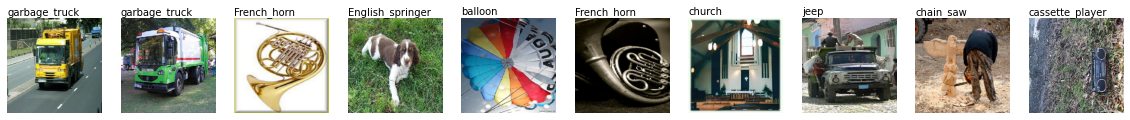

In [5]:
plt.figure(figsize=(20,5))
for idx in range(numToFetch):
  plt.subplot(2, numToFetch, idx+1)
  plt.imshow(images[idx])
  plt.axis("off")
  plt.text(0, -10, predicted[idx][0][1])

plt.show()

## Print Out the Top 3 Classification for Each Test Image

In [6]:
for idx in range(numToFetch):
  print('Predicted index:', idx, predicted[idx])


Predicted index: 0 [('n03417042', 'garbage_truck', 0.9943399), ('n04146614', 'school_bus', 0.0047933464), ('n04252225', 'snowplow', 0.00036024125)]
Predicted index: 1 [('n03417042', 'garbage_truck', 0.9876078), ('n03384352', 'forklift', 0.0025544346), ('n04467665', 'trailer_truck', 0.0023755378)]
Predicted index: 2 [('n03394916', 'French_horn', 0.99956125), ('n03110669', 'cornet', 0.00032550388), ('n04487394', 'trombone', 5.2254192e-05)]
Predicted index: 3 [('n02102040', 'English_springer', 0.94915265), ('n02102177', 'Welsh_springer_spaniel', 0.01709808), ('n02088238', 'basset', 0.012911109)]
Predicted index: 4 [('n02782093', 'balloon', 0.6229775), ('n03888257', 'parachute', 0.22690429), ('n03598930', 'jigsaw_puzzle', 0.02225301)]
Predicted index: 5 [('n03394916', 'French_horn', 0.9999385), ('n04192698', 'shield', 4.3244123e-05), ('n04487394', 'trombone', 6.668815e-06)]
Predicted index: 6 [('n03028079', 'church', 0.8457318), ('n03982430', 'pool_table', 0.031651746), ('n04081281', 'rest

## Additional Activities And Discussions

- Rerun again to test a different set of random images
- Do an internet search on how trained models may be fooled by certain input that otherwise would not fool a human.
- It is reported in the media that how a machine learning model arrives at its conclusion is often not explanable. Do you think this is is an accurate portrayal?
- It is reported in the media that some machine learning models are biased. Given what you have learned, what are the potential sources of bias? Do an internet search to validate your answers.
- Now that you know more about the internals of artificial neural networks, how do you think they compare to biological neural networks? How close are we to "general intelligence"?
